In [1]:
import os
os.chdir("/Users/zyxu/Documents/py/NLP/com_icl")
import json
from datasets import load_dataset
cache_dir = "./cofe/cache"
import numpy as np

# Function to load JSON data from a file
def load_json(file_path):
    with open(file_path, 'r') as file:
        return json.load(file)
    

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

/Users/zyxu/opt/anaconda3/envs/lmeval/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
file = "./output/wer_total.json"
data = load_json(file)

In [3]:
df = pd.DataFrame(data)
id = [0,1,2,3,0,1,2,0,1,2,3]
df['id_axis'] = id  * 3

# Assuming your DataFrame is named df
def categorize_model(row):
    if 'gpt' in row['model']:
        return 'gpt'
    elif 'llama' in row['model']:
        return 'llama'
    elif 'pythia' in row['model']:
        return 'pythia'
    else:
        return 'other'

df['group'] = df.apply(categorize_model, axis=1)
df.head()
# df['wer'] = sigmoid(1/df['wer'])

ValueError: Length of values (33) does not match length of index (36)

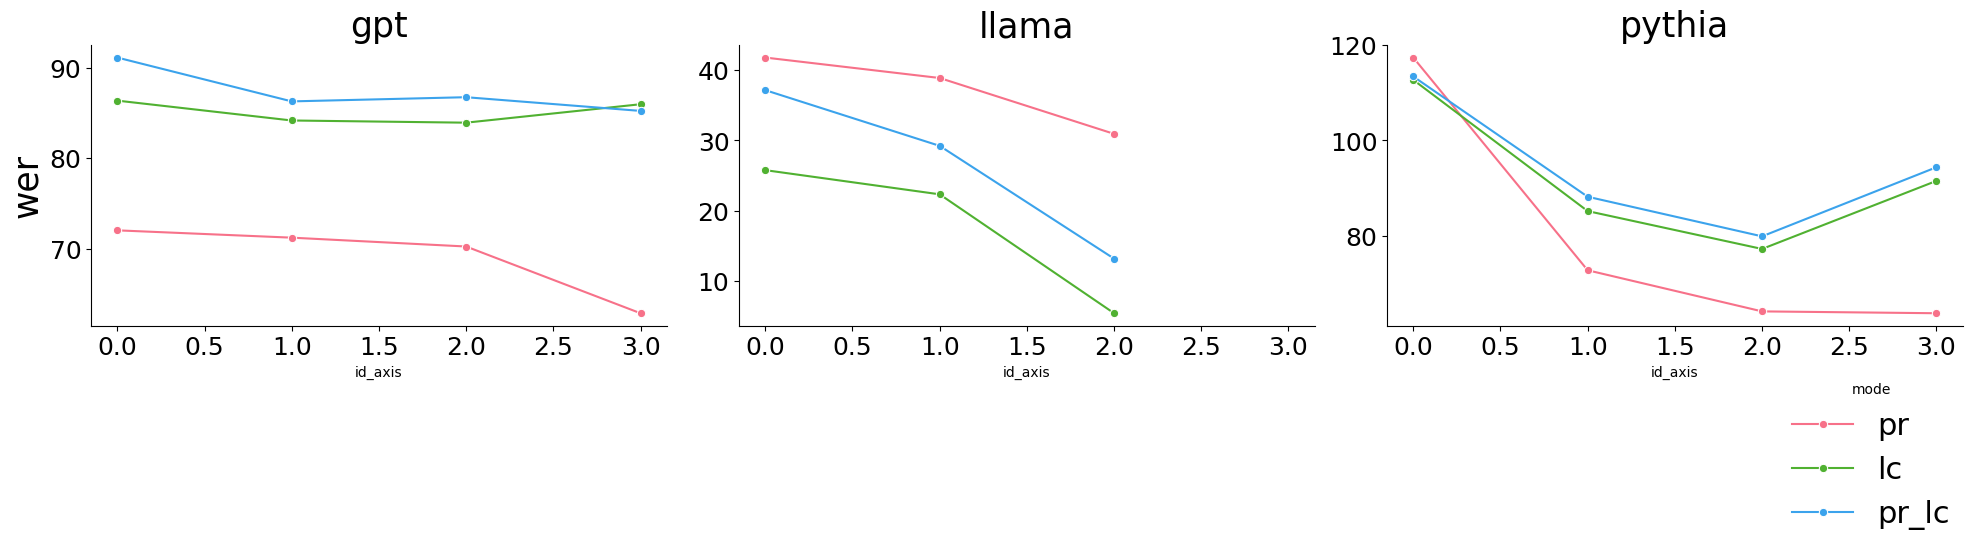

In [27]:
unique_task = df["task"].unique()
palette = dict(zip(unique_task, sns.color_palette("husl", n_colors=len(unique_task))))


# Plot using FacetGrid and lineplot
g = sns.FacetGrid(df, col="group", col_wrap=3, height=4, aspect=1.5, sharey=False)
g.map_dataframe(sns.lineplot, x="id_axis", y="wer", hue="task", marker="o", palette=palette)

# Increase the size of x and y labels
for ax in g.axes.flat:
    # ax.set_xlabel(ax.get_xlabel(), fontsize=25)
    ax.set_ylabel(ax.get_ylabel(), fontsize=25)

    # Increase the size of x and y ticks
    ax.tick_params(labelsize=18)
g.add_legend(title="mode", loc="upper right", bbox_to_anchor=(1, 0.1), fontsize=22, title_fontsize=22)
g.set_titles(col_template="{col_name}", size = 25)

# Display the plots
plt.tight_layout()
plt.show()

In [22]:
df['wer'] = df['wer'].round(2)
df['wer_std'] = df['wer_std'].round(2)

In [23]:
df

,model,task,wer,wer_std,dis,dis_std,id_axis,group
0,gpt2,pr,72.03,1.26,1232.800000,22.276987,0,gpt
1,gpt2-large,pr,71.22,1.14,1219.300000,22.229204,1,gpt
2,gpt2-xl,pr,70.24,0.56,1202.300000,19.503967,2,gpt
3,EleutherAI_gpt-neox-20b,pr,62.85,0.32,1073.000000,13.124443,3,gpt
4,meta-llama_Llama-2-7b-hf,pr,41.80,0.50,715.600000,11.368229,0,llama
5,meta-llama_Llama-2-13b-hf,pr,38.89,0.55,675.000000,12.378005,1,llama
6,meta-llama_Llama-2-70b-hf,pr,30.94,0.69,537.700000,13.368198,2,llama
7,EleutherAI_pythia-70m,pr,117.33,4.85,1989.700000,82.210485,0,pythia
8,EleutherAI_pythia-410m,pr,72.87,1.04,1250.100000,21.027125,1,pythia
9,EleutherAI_pythia-6.9b,pr,64.27,0.31,1099.000000,13.635212,2,pythia
